In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
train_data=x_train.join(y_train)

In [10]:
train_datatrain_data=x_train.join(y_train)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

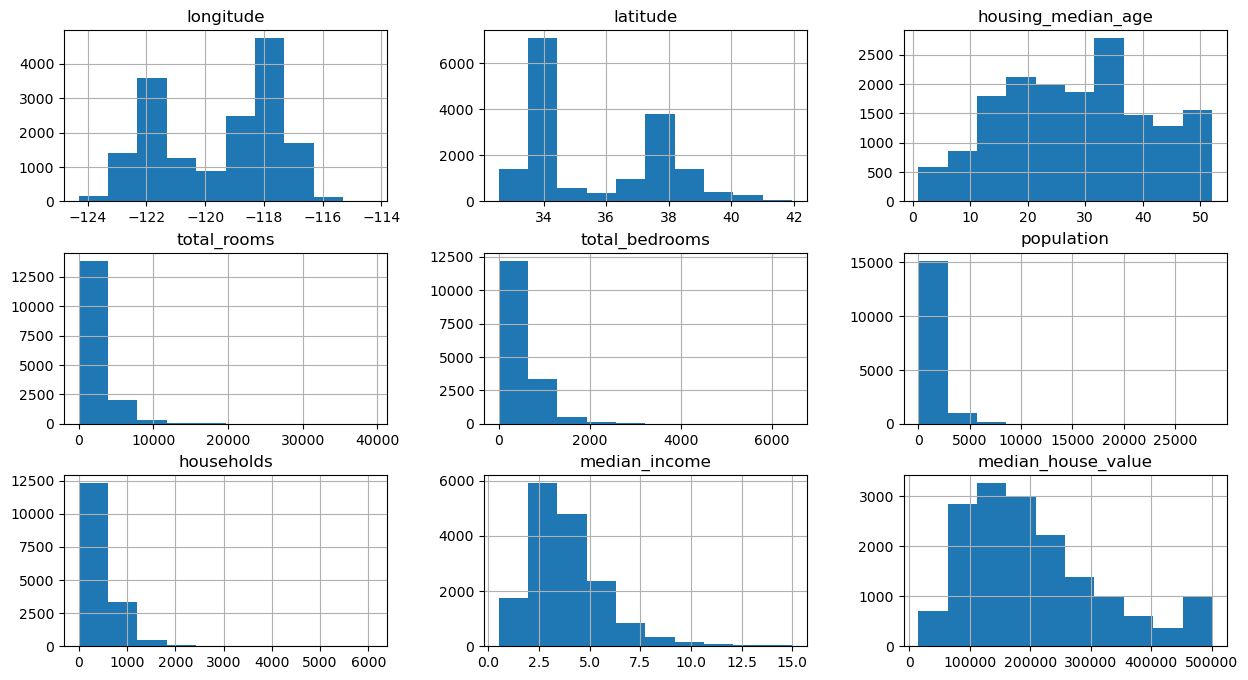

In [11]:
train_data.hist(figsize=(15,8))

In [12]:
train_data_encoded = pd.get_dummies(train_data)
train_data_encoded.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924746,-0.106236,0.050813,0.072815,0.105720,0.059929,-0.016205,-0.043599,0.321353,-0.056117,0.009840,-0.474172,0.047751
latitude,-0.924746,1.000000,0.010206,-0.043054,-0.071226,-0.116465,-0.076378,-0.079594,-0.145346,-0.446416,0.351186,-0.016855,0.358069,-0.162312
housing_median_age,-0.106236,0.010206,1.000000,-0.363563,-0.321214,-0.302162,-0.303485,-0.123958,0.102459,0.042198,-0.231647,0.021332,0.251718,0.021149
total_rooms,0.050813,-0.043054,-0.363563,1.000000,0.929546,0.864752,0.918280,0.196835,0.136018,-0.002332,0.023182,-0.006073,-0.023146,-0.006646
total_bedrooms,0.072815,-0.071226,-0.321214,0.929546,1.000000,0.885852,0.980087,-0.009280,0.051938,0.020683,-0.010021,-0.002486,-0.018066,0.000403
population,0.105720,-0.116465,-0.302162,0.864752,0.885852,1.000000,0.914210,0.006789,-0.022058,0.076581,-0.024038,-0.009771,-0.061618,-0.021524
households,0.059929,-0.076378,-0.303485,0.918280,0.980087,0.914210,1.000000,0.012198,0.067614,0.044189,-0.041803,-0.008057,-0.009564,0.001973
median_income,-0.016205,-0.079594,-0.123958,0.196835,-0.009280,0.006789,0.012198,1.000000,0.686517,0.165232,-0.237226,-0.009032,0.059302,0.029200
median_house_value,-0.043599,-0.145346,0.102459,0.136018,0.051938,-0.022058,0.067614,0.686517,1.000000,0.253437,-0.482018,0.026557,0.158938,0.142710
ocean_proximity_<1H OCEAN,0.321353,-0.446416,0.042198,-0.002332,0.020683,0.076581,0.044189,0.165232,0.253437,1.000000,-0.604917,-0.013881,-0.315321,-0.342699


<AxesSubplot:>

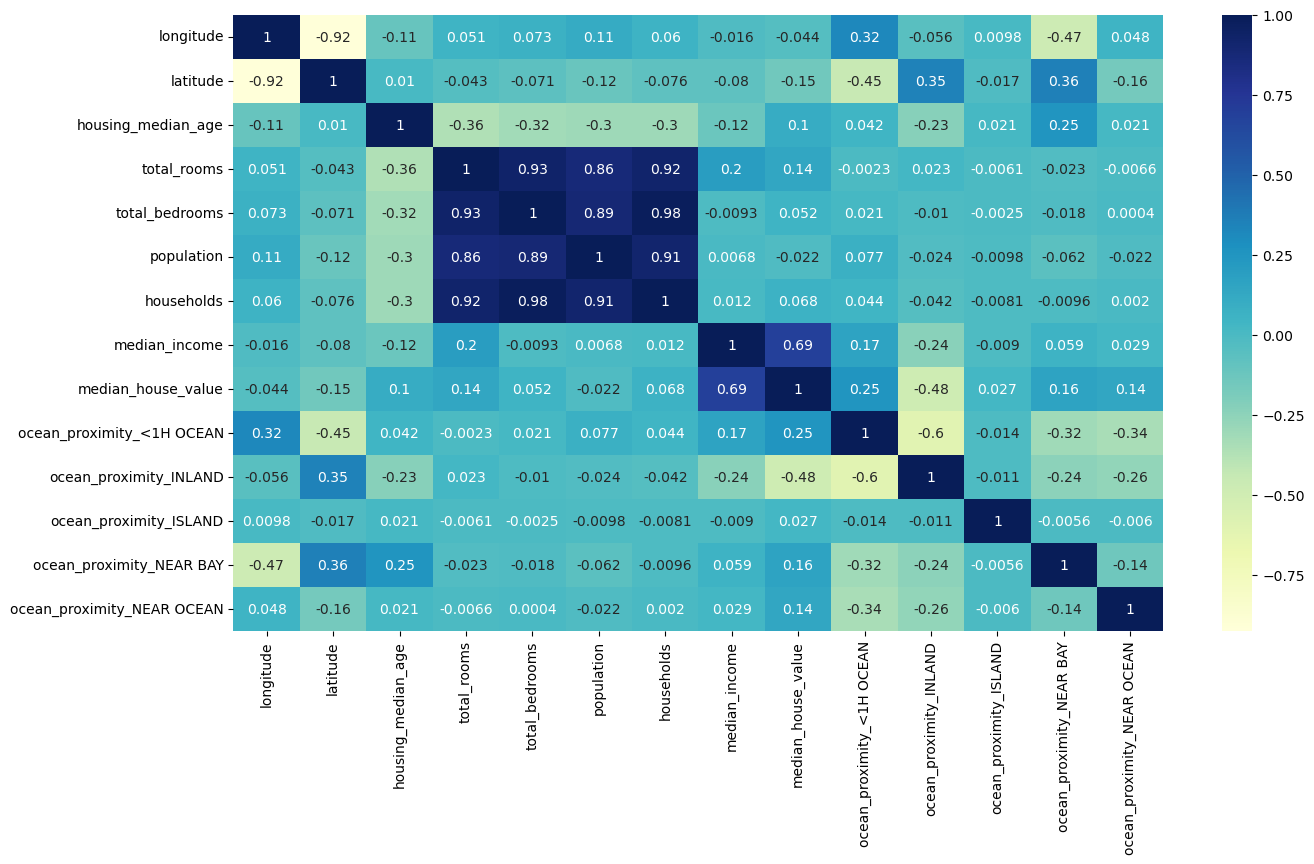

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_encoded.corr(),annot=True,cmap="YlGnBu")

In [14]:
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

In [15]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18166,-122.02,37.35,18.0,7.108244,5.545177,6.230481,5.605802,5.3679,228400.0,1,0,0,0,0
7881,-118.12,33.87,21.0,8.233503,6.986566,7.560080,6.885510,2.5057,156300.0,1,0,0,0,0
6978,-118.03,33.97,32.0,7.811568,6.315358,7.082549,6.173786,3.8275,238500.0,1,0,0,0,0
15037,-116.98,32.77,29.0,8.177235,6.104793,7.001246,6.100319,8.0930,379600.0,1,0,0,0,0
7585,-118.22,33.90,40.0,7.497207,6.208590,7.648263,6.150603,2.3542,97900.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,-118.51,34.04,40.0,7.232010,5.123964,6.182085,5.187386,11.7045,500001.0,1,0,0,0,0
539,-122.29,37.78,42.0,7.124478,5.736572,6.711740,5.707110,1.9427,102200.0,0,0,0,1,0
13945,-117.20,34.26,17.0,9.150590,7.283448,7.232010,6.131226,6.2233,230900.0,0,1,0,0,0
4869,-118.28,34.03,41.0,7.567346,6.674561,8.046229,6.579251,1.8539,147500.0,1,0,0,0,0


<AxesSubplot:>

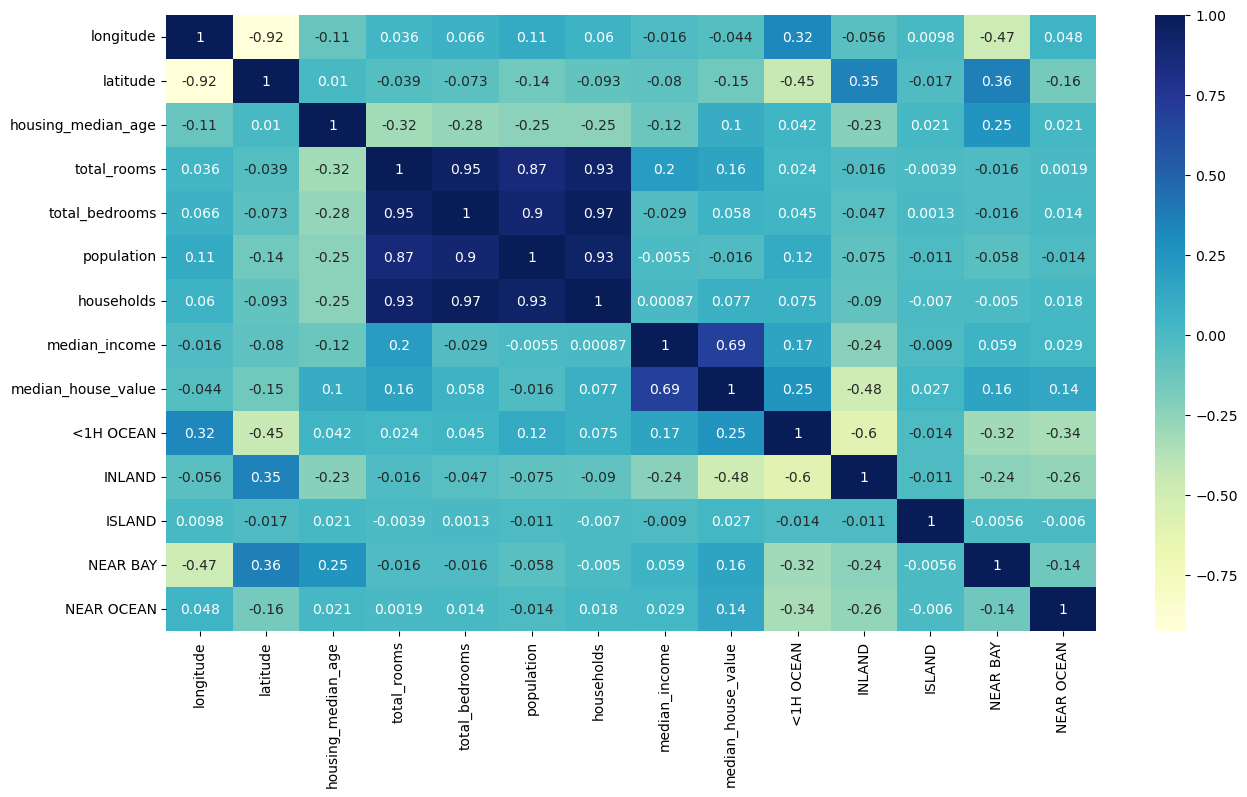

In [17]:
train_data_encoded = pd.get_dummies(train_data)
plt.figure(figsize=(15,8))
sns.heatmap(train_data_encoded.corr(),annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

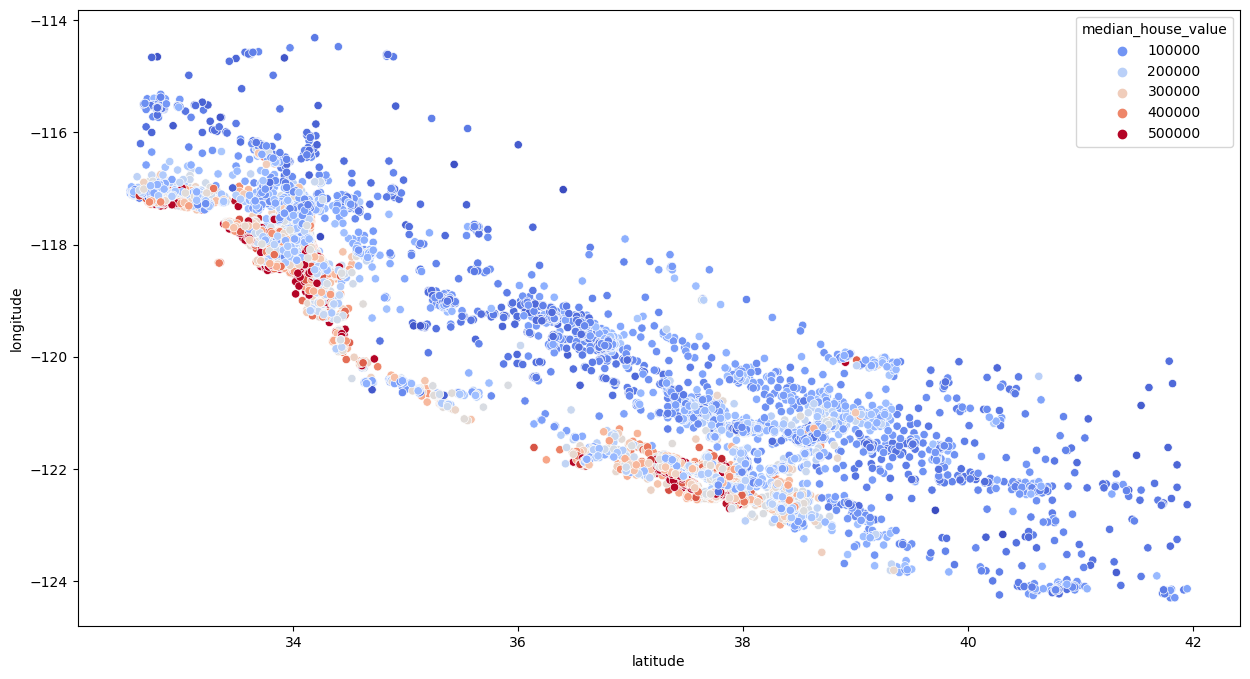

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value',palette='coolwarm')

In [19]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['house_hold_rooms']=train_data['total_rooms']/train_data['households']

<AxesSubplot:>

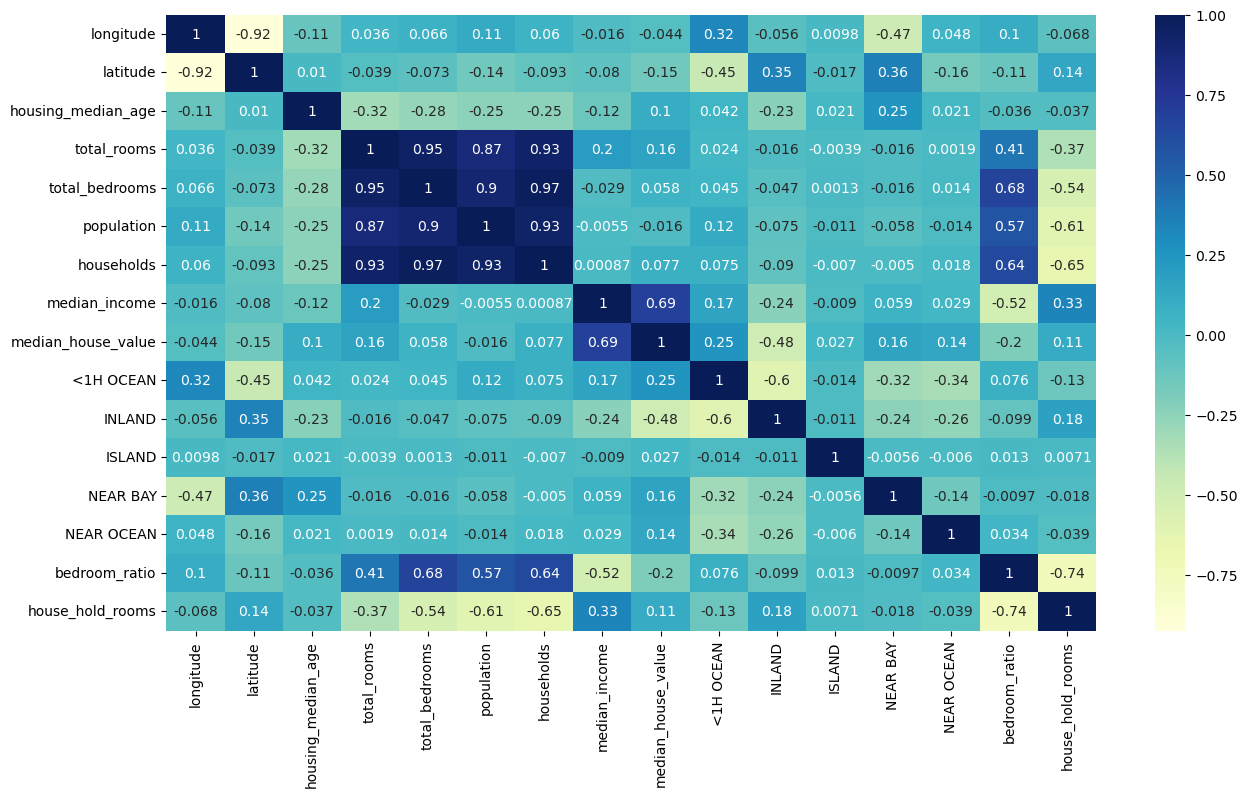

In [20]:
train_data_encoded = pd.get_dummies(train_data)
plt.figure(figsize=(15,8))
sns.heatmap(train_data_encoded.corr(),annot=True,cmap="YlGnBu")

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_train_s=scaler.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [22]:
test_data=x_test.join(y_test)
test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)
test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['house_hold_rooms']=test_data['total_rooms']/test_data['households']

In [23]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,house_hold_rooms
18166,-122.02,37.35,18.0,7.108244,5.545177,6.230481,5.605802,5.3679,228400.0,1,0,0,0,0,0.780105,1.268016
7881,-118.12,33.87,21.0,8.233503,6.986566,7.560080,6.885510,2.5057,156300.0,1,0,0,0,0,0.848553,1.195773
6978,-118.03,33.97,32.0,7.811568,6.315358,7.082549,6.173786,3.8275,238500.0,1,0,0,0,0,0.808462,1.265280
15037,-116.98,32.77,29.0,8.177235,6.104793,7.001246,6.100319,8.0930,379600.0,1,0,0,0,0,0.746560,1.340460
7585,-118.22,33.90,40.0,7.497207,6.208590,7.648263,6.150603,2.3542,97900.0,1,0,0,0,0,0.828120,1.218939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,-118.51,34.04,40.0,7.232010,5.123964,6.182085,5.187386,11.7045,500001.0,1,0,0,0,0,0.708512,1.394153
539,-122.29,37.78,42.0,7.124478,5.736572,6.711740,5.707110,1.9427,102200.0,0,0,0,1,0,0.805192,1.248351
13945,-117.20,34.26,17.0,9.150590,7.283448,7.232010,6.131226,6.2233,230900.0,0,1,0,0,0,0.795954,1.492457
4869,-118.28,34.03,41.0,7.567346,6.674561,8.046229,6.579251,1.8539,147500.0,1,0,0,0,0,0.882021,1.150183


In [24]:
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

In [25]:
x_test_s=scaler.transform(x_test)

In [26]:
reg.score(x_test_s,y_test)

0.6802895022751014

In [27]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(x_train_s,y_train)

RandomForestRegressor()

In [28]:
forest.score(x_test_s,y_test)

0.833466101890314

In [29]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,house_hold_rooms
18985,-121.94,38.27,35.0,9.293762,7.708411,9.198268,7.674617,2.5681,81300.0,0,1,0,0,0,0.829418,1.210974
11158,-118.00,33.82,21.0,7.720462,6.364751,7.337588,6.216606,3.2326,204700.0,1,0,0,0,0,0.824400,1.241909
9364,-122.54,37.94,39.0,8.208219,6.654153,7.326466,6.670766,4.4081,435200.0,0,0,0,1,0,0.810669,1.230476
11131,-117.93,33.85,31.0,7.673223,6.144186,6.874198,5.713733,3.8750,183900.0,1,0,0,0,0,0.800731,1.342944
19186,-122.66,38.46,14.0,7.768533,6.448889,7.170888,6.439350,2.6023,221100.0,1,0,0,0,0,0.830130,1.206416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,-120.80,38.31,37.0,7.201916,5.549076,6.280396,5.493061,3.2135,123600.0,0,1,0,0,0,0.770500,1.311093
3701,-118.36,34.18,34.0,7.294377,6.049733,6.903747,5.958425,2.9583,188700.0,1,0,0,0,0,0.829369,1.224212
10013,-121.18,39.26,14.0,6.699500,5.087596,5.866468,4.804021,3.5938,140300.0,0,1,0,0,0,0.759399,1.394561
10872,-117.90,33.72,33.0,7.868637,6.333280,8.055475,6.298949,4.3899,180700.0,1,0,0,0,0,0.804876,1.249198


In [30]:
custominput=np.array([[14200,-117.02,32.70,18.0,7.404888,5.648974,7.034388,5.598422,5.1769,133000.0,0,0,0,0,1]])
custominput2=np.array([[12603,-121.47,38.53,43.0,8.075894,6.587550,7.783641,6.439350,1.4625,54400.0,0,1,0,0,0]])

In [31]:
prediction=forest.predict(custominput)
prediction2=forest.predict(custominput2)


In [32]:
print(prediction)
print(prediction2)


[441708.55]
[439434.54]
